<a href="https://colab.research.google.com/github/YoussefKhafaga/Modulation-Classification/blob/main/Modulation_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1- Downalod data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import tensorflow as tf
tf.test.gpu_device_name()
import pandas as pd

Mounted at /content/drive


In [ ]:
import pickle as cPickle
import numpy as np

Xd = cPickle.load(open("/content/drive/MyDrive/RML2016.10b.dat",'rb'),encoding = 'bytes')
snrs, mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X = [] 
Y = []
snrlist = []
modlist = []
for mod in mods:
    for snr in snrs:
        X.append(Xd[(mod,snr)])
        for i in range(Xd[(mod,snr)].shape[0]):
          #Y.append([(mod, snr)])
          modlist.append(mod)
          snrlist.append(snr)
X = np.vstack(X)
d = {'mod': modlist, 'snr': snrlist}

df = pd.DataFrame(data=d)
Xd = None
del Xd


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


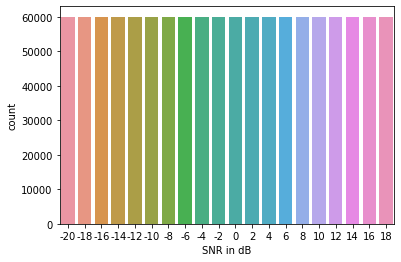

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.countplot(snrlist);
plt.xlabel("SNR in dB")
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


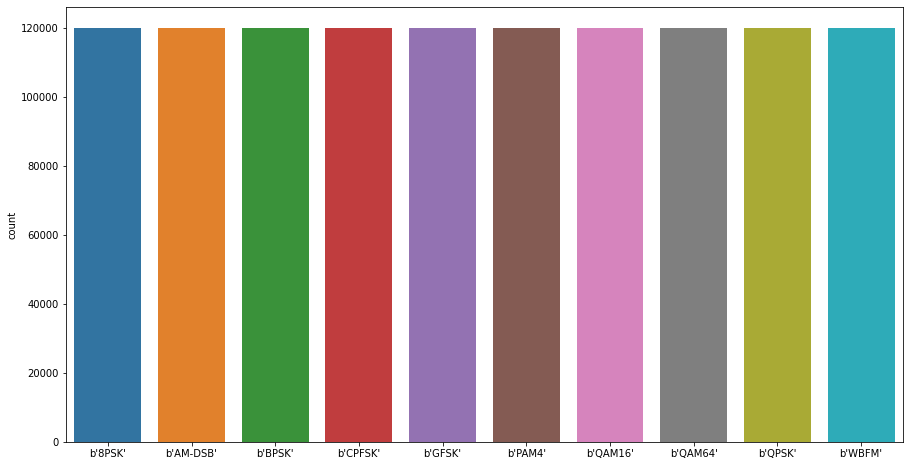

In [ ]:
rcParams['figure.figsize'] = 15,8
sns.countplot(modlist)

In [ ]:
#to change labels into integers 
df['mod']=np.unique(df['mod'], return_inverse=True)[1]


In [ ]:
print(df['mod'])

0          0
1          0
2          0
3          0
4          0
          ..
1199995    9
1199996    9
1199997    9
1199998    9
1199999    9
Name: mod, Length: 1200000, dtype: int64


#2- Feature extraction

#Data split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, df, test_size=0.3, random_state=42, stratify=df)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,test_size=0.05, random_state=42, stratify=y_train)

In [ ]:
y_train = y_train.drop(['snr'], axis=1)
y_val = y_val.drop(['snr'], axis=1)
print(y_train)

         mod
233836     1
534991     4
1189815    9
706109     5
1014390    8
...      ...
988809     8
445659     3
732046     6
826297     6
18485      0

[798000 rows x 1 columns]


In [ ]:
X = None
del X
Y = None
del Y
snrs = None
del snrs
mods = None
del mods

In [ ]:
X_train = np.expand_dims(X_train, axis = 2)
X_test = np.expand_dims(X_test, axis = 2)
X_val = np.expand_dims(X_val, axis = 2)

In [ ]:
import scipy.integrate as it
featurespace = list()
for i in range(len(X_train)):
  featurespace.append([X_train[i][0], X_train[i][1], np.diff(np.hstack((0, X_train[i][0]))), np.diff(np.hstack((0, X_train[i][1]))), it.cumtrapz(X_train[i][0], initial = 0), it.cumtrapz(X_train[i][1], initial = 0)])

In [ ]:
featurespace_val = list()
for i in range(len(X_val)):  
  featurespace_val.append([X_val[i][0], X_val[i][1], np.diff(np.hstack((0, X_val[i][0]))), np.diff(np.hstack((0, X_val[i][1]))), it.cumtrapz(X_val[i][0], initial = 0), it.cumtrapz(X_val[i][1], initial = 0)])

In [ ]:
featurespace_test = list()
for i in range(len(X_test)):  
  featurespace_test.append([X_test[i][0], X_test[i][1], np.diff(np.hstack((0, X_test[i][0]))), np.diff(np.hstack((0, X_test[i][1]))), it.cumtrapz(X_test[i][0], initial = 0), it.cumtrapz(X_test[i][1], initial = 0)])

In [ ]:
X_train = None
del X_train
X_val = None
del X_val

In [ ]:
featurespace_validation = np.expand_dims(featurespace_val, axis = 2)
featurespace_val = None
del featurespace_val

In [ ]:
print(featurespace_validation.shape)

(42000, 6, 1, 128)


In [ ]:
featurespace_train = np.expand_dims(featurespace, axis = 2)
featurespace = None
del featurespace

In [ ]:
print(featurespace_train.shape)

(798000, 6, 1, 128)


In [ ]:
featurespace_train = None
del featurespace_train
featurespace_validation = None
del featurespace_validation

In [ ]:
featurespace_test1 = np.expand_dims(featurespace_test, axis = 2)
featurespace_test = None
del featurespace_test

## Dataset class

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


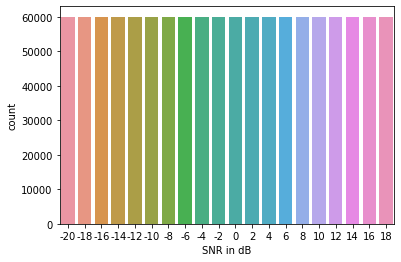

In [ ]:
import seaborn as sns  
sns.countplot(snrlist);
plt.xlabel("SNR in dB")
plt.show();

In [ ]:
y_train=np.array(y_train)
y_val=np.array(y_val)
# y_test=np.array(y_test)
y_train = np.unique(y_train, return_inverse= True)[1]
y_val = np.unique(y_val, return_inverse= True)[1]
# y_test = np.unique(y_test, return_inverse= True)[1]

In [ ]:
print(y_train)

[1 4 9 ... 6 6 0]


In [ ]:
class Dataset:
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
    def __len__(self):
        return len(self.data)
    def __getitem__(self, idx):
        sample = torch.tensor(self.data[idx], dtype= torch.float )        
        label = torch.tensor(self.labels[idx], dtype= torch.int )        
        return sample, label

## CNN


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
class CNN(nn.Module):
    def __init__(self):
      super(CNN, self).__init__()
      self.conv1 = nn.Conv2d(2, 64, (1,5), 1,2)
      self.conv2 = nn.Conv2d(64, 32, (2,3), 1)
      self.conv3 = nn.Conv2d(32,16,(1,5),1)

      self.fc1 = nn.Linear(7808, 256)
      self.fc2 = nn.Linear(256, 128)

      self.fc3 = nn.Linear(128, 10)


       # self.conv3 = nn.Conv2d(128,64,3,1)
      # self.conv4 = nn.Conv2d(64,32,3,1)
      self.dropout1 = nn.Dropout(0.5)
      self.dropout2 = nn.Dropout(0.5)
      torch.nn.init.xavier_uniform_(self.conv1.weight)
      torch.nn.init.xavier_uniform_(self.conv2.weight)
      # torch.nn.init.xavier_uniform_(self.conv3.weight)
      torch.nn.init.xavier_uniform_(self.fc1.weight)
      torch.nn.init.xavier_uniform_(self.fc3.weight)


    # x represents our data
    def forward(self, x):
      # Pass data through conv1
      x = self.conv1(x)
      # Use the rectified-linear activation function over x
      x = F.relu(x)
      # Run max pooling over x
      # x = F.max_pool2d(x, 5, 2)
      # Pass data through conv2
      x = self.conv2(x)
      x = F.relu(x)
      # x = F.max_pool2d(x, 3, 2)
      x = self.conv3(x)
      x = F.relu(x)
      # x = F.max_pool2d(x, 5, 2)
      x = torch.flatten(x, 1)
      # x = self.dropout1(x)
      x = self.fc1(x)
      x = F.relu(x)
      x = self.fc2(x)
      x = F.relu(x)
      x = self.dropout2(x)
      x = self.fc3(x)

      # Apply softmax to x
      output = F.log_softmax(x, dim=1)
      return output

In [ ]:
from torch.optim.swa_utils import AveragedModel, SWALR
from torch.optim.lr_scheduler import CosineAnnealingLR
def train_single_epoch(model, train_loader,validate_dataloader, loss_fn, optimiser, device):
    correct = 0
    total = 0
    train_correct = []
    val_correct = []
    train_loss = 0.0
    model.train()

    for input, target in train_loader:
        input = input.to(device)
        target = target.type(torch.LongTensor)
        target = target.to(device)
       
        prediction = model(input)
        loss = loss_fn(prediction, target)
        # backpropagate error and update weights
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()
        lr = optimiser.param_groups[0]["lr"]
        train_loss += loss.item()
        for index, tensor_value in enumerate(prediction):
            total +=1
            # print("in for",total)
            if torch.argmax(tensor_value) == target[index]:
                correct += 1
                # print("in if",correct)
        # y_max_scores, y_max_idx = prediction.max(dim=1)
        # predi = y_max_idx
        # correct = (target == predi).sum()
        # correct = correct.item()
        # train_correct.append(correct)
    lrs.append(lr)
    accuracy_train = correct /total

    # acc = sum(train_correct)/X_train.shape[0]
    # print(total,len(val_dataloader))
    print("Training\n----------------------")
    print("before acc",total,correct)
    # print(acc)
    print("Accuracy = {}".format(accuracy_train))
    print("lr",lr)

    print(f"loss: {train_loss/len(train_loader)}")
    train_losses.append(train_loss/len(train_loader))
    train_accu.append(accuracy_train)

    correct = 0
    total = 0
    valid_loss = 0.0
    model.eval()
    for input, target in validate_dataloader:
      input = input.to(device)
      target = target.type(torch.LongTensor)
      target = target.to(device)
      # calculate loss
      prediction = model(input)
      # print("pred size",prediction.shape)
      # print("pred size",prediction.shape)

      loss = loss_fn(prediction, target)
      valid_loss = loss.item()*input.size(0)
      # y_max_scores, y_max_idx = prediction.max(dim=1)
      # predi = y_max_idx
      # correct = (target == predi).sum()
      # correct = correct.item()
      # val_correct.append(correct) 
      for index, tensor_value in enumerate(prediction):
            total +=1
            # print("in for",total)
            if torch.argmax(tensor_value) == target[index]:
                correct += 1
                # print("in if",correct)

    print("Validating\n----------------------")
    accuracy = correct /total

    # accu_val= sum(val_correct)/X_val.shape[0]
    print("before acc",total,correct)
    # print(accu_val)
    print("Accuracy = {}".format(accuracy))

    print(f"loss: {valid_loss/len(validate_dataloader)}")
    eval_losses.append(valid_loss/len(validate_dataloader))
    eval_accu.append(accuracy)

    return train_loss/len(train_loader)

    
    # return accuracy

def train_CNN(model, train_loader,val_loader, loss_fn, optimiser, device, epochs):
  
    scheduler2 = torch.optim.lr_scheduler.MultiStepLR(optimiser, milestones=[15,25,35,45,55], gamma = 0.5)

    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimiser, patience = 3, factor=0.3, verbose=True, threshold = 1e-3)
    # scheduler = torch.optim.lr_scheduler.ExponentialLR(optimiser, gamma=0.1)


    for i in range(epochs):
        print(f"Epoch {i+1}")
        loss = train_single_epoch(model, train_loader,val_loader, loss_fn, optimiser, device)
        # scheduler.step(acc)
        scheduler.step(loss)
        scheduler2.step()


        print("---------------------------")
    print("Finished training")

In [ ]:
# TODO: change list names one for each model 
train_losses = []
train_accu = []
eval_losses = []
eval_accu = []
lrs = []
from torch.utils.data import TensorDataset, DataLoader
dataset_train = Dataset(data = featurespace_train, labels = y_train)
dataset_val = Dataset(data = featurespace_validation, labels = y_val)

if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"
cnn = CNN().to(device)
# cnn.load_state_dict(torch.load("/content/cnn2d (2).pth"))
train_dataloader = DataLoader(dataset_train, batch_size=128,shuffle = True)

print(cnn)
val_dataloader = DataLoader(dataset_val, batch_size=128)

print(len(val_dataloader))
loss_func = nn.CrossEntropyLoss()
optimiser = torch.optim.AdamW(cnn.parameters(), lr=1e-4, weight_decay=0.01)
train_CNN(cnn, train_dataloader,val_dataloader, loss_func, optimiser, device, 10)

CNN(
  (conv1): Conv2d(6, 64, kernel_size=(1, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(64, 32, kernel_size=(2, 3), stride=(1, 1))
  (conv3): Conv2d(32, 16, kernel_size=(1, 5), stride=(1, 1))
  (fc1): Linear(in_features=7808, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
)
329
Epoch 1
Training
----------------------
before acc 798000 177196
Accuracy = 0.22205012531328322
lr 0.0001
loss: 1.9850073956831418
Validating
----------------------
before acc 42000 11134
Accuracy = 0.2650952380952381
loss: 0.07866262882313829
---------------------------
Epoch 2
Training
----------------------
before acc 798000 220978
Accuracy = 0.27691478696741856
lr 0.0001
loss: 1.8104529321145897
Validating
----------------------
before acc 42000 12909
Accuracy = 0.3073571428571429
loss: 0.07294093656684852
-

In [ ]:
# TODO: change list names one for each model 
train_losses = []
train_accu = []
eval_losses = []
eval_accu = []
lrs = []
from torch.utils.data import TensorDataset, DataLoader
dataset_train = Dataset(data = X_train, labels = y_train)
dataset_val = Dataset(data = X_val, labels = y_val)

if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"
cnn = CNN().to(device)
# cnn.load_state_dict(torch.load("/content/cnn2d (2).pth"))
train_dataloader = DataLoader(dataset_train, batch_size=128,shuffle = True)

print(cnn)
val_dataloader = DataLoader(dataset_val, batch_size=128)

print(len(val_dataloader))
loss_func = nn.CrossEntropyLoss()
optimiser = torch.optim.AdamW(cnn.parameters(), lr=1e-4, weight_decay=0.01)
train_CNN(cnn, train_dataloader,val_dataloader, loss_func, optimiser, device, 10)

CNN(
  (conv1): Conv2d(2, 64, kernel_size=(1, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(64, 32, kernel_size=(2, 3), stride=(1, 1))
  (conv3): Conv2d(32, 16, kernel_size=(1, 5), stride=(1, 1))
  (fc1): Linear(in_features=7808, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
)
329
Epoch 1
Training
----------------------
before acc 798000 149918
Accuracy = 0.1878671679197995
lr 0.0001
loss: 2.0478813088599837
Validating
----------------------
before acc 42000 11302
Accuracy = 0.2690952380952381
loss: 0.08280973231538813
---------------------------
Epoch 2
Training
----------------------
before acc 798000 247706
Accuracy = 0.31040852130325813
lr 0.0001
loss: 1.7317336990819898
Validating
----------------------
before acc 42000 15263
Accuracy = 0.3634047619047619
loss: 0.0731050787001033
---

In [ ]:
torch.save(cnn.state_dict(), "/content/drive/MyDrive/cnn50.pth")

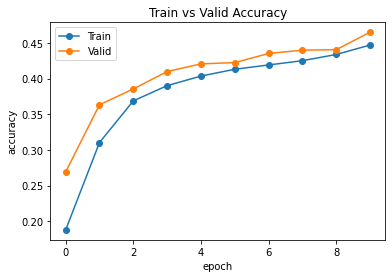

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_accu,'-o')
plt.plot(eval_accu,'-o')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Accuracy')

plt.show()

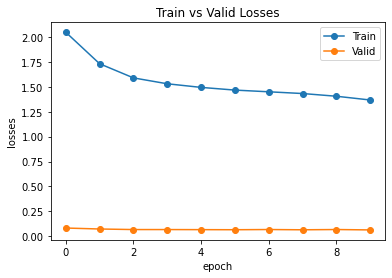

In [ ]:
plt.plot(train_losses,'-o')
plt.plot(eval_losses,'-o')
plt.xlabel('epoch')
plt.ylabel('losses')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Losses')

plt.show()

In [ ]:
snrs = y_test['snr'].unique()
snrs.sort()

In [ ]:
print(y_test)

         mod  snr
198833     1    6
1164631    9    8
13184      0  -16
354799     2   18
413038     3   -4
...      ...  ...
478707     3   18
38964      0   -8
651348     5   -4
310360     2    2
728236     6  -18

[360000 rows x 2 columns]


In [ ]:
ind  = list(range(0,360000))
y_test.index = ind

In [ ]:
def plot_snr(model):  
  snrsacc = []
  for snr in snrs:
    currsnrindices = y_test.index[y_test['snr']==snr].tolist()
    currsnrlabels =  y_test.iloc[currsnrindices]
    currsnrlabels = currsnrlabels.drop(['snr'],axis = 1)
    currsnrlabels=np.array(currsnrlabels)
    currsnrlabels = np.unique(currsnrlabels, return_inverse= True)[1]
    currsnrSamples =featurespace_test1[currsnrindices]
    dataset_test = Dataset(data = currsnrSamples, labels = currsnrlabels)
    test_dataloader = DataLoader(dataset_test, batch_size=64)
    # print(x_spectro_test)
    snrsacc.append(test_model(model,test_dataloader,device ))
  return snrsacc



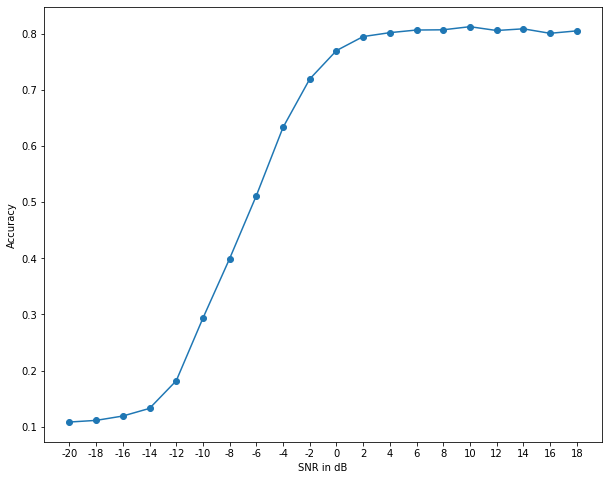

In [ ]:
from matplotlib import rcParams
from torch.utils.data import TensorDataset, DataLoader

snrsacc=plot_snr(cnn)
rcParams['figure.figsize'] = 10,8
plt.plot(snrs,snrsacc,linestyle="-",marker="o");
plt.ylabel('Accuracy')
plt.xlabel('SNR in dB')
plt.xticks(ticks=snrs, labels=snrs);


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


def test_model(model, test_dataloader, device):
  y_pred = []
  y_true = []
  acc = []
  total = 0
  correct = 0
  model.eval()
  for input, target in test_dataloader:
    input = input.to(device)
    target = target.type(torch.LongTensor)
    target = target.to(device)
    prediction = model(input)
    
    for index, tensor_value in enumerate(prediction):
            total +=1
            y_pred.append(torch.argmax(tensor_value).data.cpu().numpy())
            y_true.append(target[index].data.cpu().numpy())
            if torch.argmax(tensor_value) == target[index]:
                correct += 1
    accuracy = correct /total
    acc.append(accuracy)
  acc = np.array(acc)
  return np.mean(acc)



## RNN

In [ ]:
from torch.nn.modules import dropout
import torch
import torch.nn as nn
import torch.nn.functional as F
class RNN(nn.Module):
    def __init__(self):
      super(RNN, self).__init__()
      self.rnn = nn.RNN(768, 512, 4)
      self.fc = nn.Linear(512, 10)

    def forward(self, x):
      h0 = torch.zeros(4, x.size(2), 512).to(device)
      batchSize = x.size(0)
      x = x.reshape((batchSize,1,768))
      x, _ = self.rnn(x,  h0)
      x = x.contiguous().view(-1, 512)
      x = self.fc(x)
      output = F.log_softmax(x, dim=1)
      return output

In [ ]:
lrs = []
train_losses = []
train_accu = []
eval_losses = []
eval_accu = []

def train_single_epoch(model, train_loader,validate_dataloader, loss_fn, optimiser, device):
    correct = 0
    total = 0
    train_loss = 0.0
    model.train()

    for input, target in train_loader:
        input = input.to(device)
        target = target.type(torch.LongTensor)
        target = target.to(device)
        # calculate loss
        prediction = model(input)
        loss = loss_fn(prediction, target)

        # backpropagate error and update weights
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()
        lr = optimiser.param_groups[0]["lr"]
        train_loss += loss.item()

        for index, tensor_value in enumerate(prediction):
            total +=1
            # print("in for",total)
            if torch.argmax(tensor_value) == target[index]:
                correct += 1
                # print("in if",correct)

    lrs.append(lr)
    accuracy_train = correct /total
    print("Training\n----------------------")
    print("before acc",total,correct)
    print("Accuracy = {}".format(accuracy_train))
    print("lr",lr)

    print(f"loss: {train_loss/len(train_loader)}")
    train_losses.append(train_loss/len(train_loader))
    train_accu.append(accuracy_train)
    model.eval()

    correct = 0
    total = 0
    valid_loss = 0.0
    for input, target in validate_dataloader:
      input = input.to(device)
      target = target.type(torch.LongTensor)
      target = target.to(device)
      # calculate loss
      prediction = model(input)
      loss = loss_fn(prediction, target)
      valid_loss = loss.item()*input.size(0)
      for index, tensor_value in enumerate(prediction):
            total +=1
            # print("in for",total)
            if torch.argmax(tensor_value) == target[index]:
                correct += 1
                # print("in if",correct)

    print("Validating\n----------------------")
    accuracy = correct /total
    print("Accuracy = {}".format(accuracy))

    print(f"loss: {valid_loss/len(validate_dataloader)}")
    eval_losses.append(valid_loss/len(validate_dataloader))
    eval_accu.append(accuracy)

    return train_loss/len(train_loader)

    
    # return accuracy

def train(model, train_loader,val_loader, loss_fn, optimiser, device, epochs):
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimiser, patience = 3, factor=0.3, verbose=True, threshold = 1e-3)
    scheduler2 = torch.optim.lr_scheduler.MultiStepLR(optimiser, milestones=[20,30,40], gamma = 0.5)
    for i in range(epochs):
        print(f"Epoch {i+1}")
        loss = train_single_epoch(model, train_loader,val_loader, loss_fn, optimiser, device)
        scheduler.step(loss)
        scheduler2.step()
        print("---------------------------")
    print("Finished training")


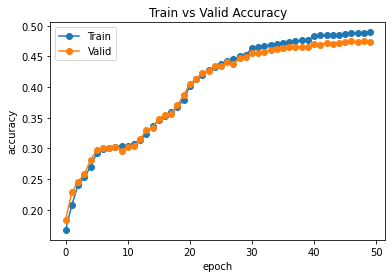

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_accu,'-o')
plt.plot(eval_accu,'-o')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Accuracy')

plt.show()

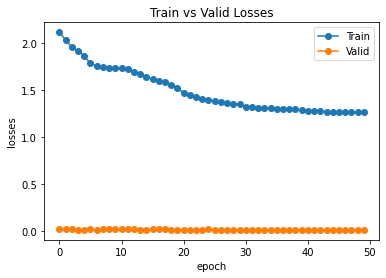

In [ ]:
plt.plot(train_losses,'-o')
plt.plot(eval_losses,'-o')
plt.xlabel('epoch')
plt.ylabel('losses')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Losses')

plt.show()

In [ ]:
torch.cuda.empty_cache()


In [ ]:
from torch.utils.data import DataLoader
train_losses = []
train_accu = []
eval_losses = []
eval_accu = []
lrs = []
dataset_train = Dataset(data = featurespace_train, labels = y_train)
dataset_val = Dataset(data = featurespace_validation, labels = y_val)
if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"
rnn = RNN().to(device)
train_dataloader = DataLoader(dataset_train, batch_size=32, shuffle = True)

val_dataloader = DataLoader(dataset_val, batch_size=32)

loss_func = nn.CrossEntropyLoss()
optimiser = torch.optim.Adam(rnn.parameters(), lr=1e-4)
train(rnn, train_dataloader,val_dataloader, loss_func, optimiser, device, 50)

Epoch 1
Training
----------------------
before acc 798000 164108
Accuracy = 0.20564912280701755
lr 0.0001
loss: 2.0336027875039524
Validating
----------------------
Accuracy = 0.24142857142857144
loss: 0.02228771305592661
---------------------------
Epoch 2
Training
----------------------
before acc 798000 208549
Accuracy = 0.26133959899749376
lr 0.0001
loss: 1.8849665209422737
Validating
----------------------
Accuracy = 0.2741190476190476
loss: 0.020734628646862208
---------------------------
Epoch 3
Training
----------------------
before acc 798000 224886
Accuracy = 0.28181203007518796
lr 0.0001
loss: 1.8105230885066737
Validating
----------------------
Accuracy = 0.2884047619047619
loss: 0.021267817570612982
---------------------------
Epoch 4
Training
----------------------
before acc 798000 234560
Accuracy = 0.2939348370927318
lr 0.0001
loss: 1.7642514323431044
Validating
----------------------
Accuracy = 0.29595238095238097
loss: 0.019075136555121858
---------------------------


In [ ]:
torch.save(rnn.state_dict(), "/content/drive/MyDrive/rnn49.pth")

In [ ]:
rnn = RNN().to(device)
rnn.load_state_dict(torch.load("/content/drive/MyDrive/rnn49.pth"))

<All keys matched successfully>

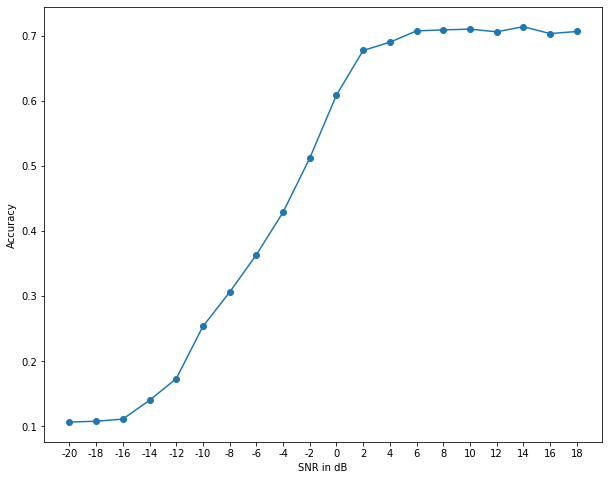

In [ ]:
snrsacc=plot_snr(rnn)
rcParams['figure.figsize'] = 10,8
plt.plot(snrs,snrsacc,linestyle="-",marker="o");
plt.ylabel('Accuracy')
plt.xlabel('SNR in dB')
plt.xticks(ticks=snrs, labels=snrs);

#LSTM

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
from torch.autograd import Variable

In [ ]:
class LSTM(nn.Module):
    def __init__(self):
        super(LSTM, self).__init__()
        
        self.num_layers = 5
        self.hidden_size = 128

        #self.rnn = nn.RNN(2, hidden_size, num_layers, batch_first=True)
        # -> x needs to be: (batch_size, seq, input_size)

        self.lstm = nn.LSTM(768, self.hidden_size, self.num_layers, batch_first=True)
        self.fc = nn.Linear(self.hidden_size, 10)
        
    def forward(self, x):
        # Set initial hidden states (and cell states for LSTM)
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) 
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) 
        
        #out, _ = self.rnn(x, h0)  
        x = x.reshape((x.size(0), 1, 768))
        out, _ = self.lstm(x, (h0,c0))  
        out = out.contiguous().view(-1, 128)
        out = self.fc(out)
        return out

#Expected hidden[0] size (10, 128, 128), got [10, 1, 128]


In [ ]:
lrs = []
train_losses = []
train_accu = []
eval_losses = []
eval_accu = []

def train_single_epoch(model, train_loader,validate_dataloader, loss_fn, optimiser, device):
    correct = 0
    total = 0
    train_loss = 0.0
    model.train()

    for input, target in train_loader:
        input = input.to(device)
        target = target.type(torch.LongTensor)
        target = target.to(device)
        # calculate loss
        prediction = model(input)
        loss = loss_fn(prediction, target)

        # backpropagate error and update weights
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()
        lr = optimiser.param_groups[0]["lr"]
        train_loss += loss.item()

        for index, tensor_value in enumerate(prediction):
            total +=1
            # print("in for",total)
            if torch.argmax(tensor_value) == target[index]:
                correct += 1
                # print("in if",correct)

    lrs.append(lr)
    accuracy_train = correct /total
    print("Training\n----------------------")
    print("before acc",total,correct)
    print("Accuracy = {}".format(accuracy_train))
    print("lr",lr)

    print(f"loss: {train_loss/len(train_loader)}")
    train_losses.append(train_loss/len(train_loader))
    train_accu.append(accuracy_train)
    model.eval()

    correct = 0
    total = 0
    valid_loss = 0.0
    for input, target in validate_dataloader:
      input = input.to(device)
      target = target.type(torch.LongTensor)
      target = target.to(device)
      # calculate loss
      prediction = model(input)
      loss = loss_fn(prediction, target)
      valid_loss = loss.item()*input.size(0)
      for index, tensor_value in enumerate(prediction):
            total +=1
            # print("in for",total)
            if torch.argmax(tensor_value) == target[index]:
                correct += 1
                # print("in if",correct)

    print("Validating\n----------------------")
    accuracy = correct /total
    print("Accuracy = {}".format(accuracy))

    print(f"loss: {valid_loss/len(validate_dataloader)}")
    eval_losses.append(valid_loss/len(validate_dataloader))
    eval_accu.append(accuracy)

    return train_loss/len(train_loader)

    
    # return accuracy

def train(model, train_loader,val_loader, loss_fn, optimiser, device, epochs):
    scheduler2 = torch.optim.lr_scheduler.MultiStepLR(optimiser, milestones=[20,40], gamma = 0.5)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimiser, patience = 3, factor=0.3, verbose=True, threshold = 1e-3)
    for i in range(epochs):
        print(f"Epoch {i+1}")
        loss = train_single_epoch(model, train_loader,val_loader, loss_fn, optimiser, device)
        scheduler.step(loss)
        scheduler2.step()
        print("---------------------------")
    print("Finished training")


#Sum of features 

In [ ]:
from torch.utils.data import TensorDataset, DataLoader
import torch
train_losses = []
train_accu = []
eval_losses = []
eval_accu = []
lrs = []
dataset_train = Dataset(data = X_train, labels = y_train)
dataset_val = Dataset(data = X_val, labels = y_val)

if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"
lstm = LSTM().to(device)
train_dataloader = DataLoader(dataset_train, batch_size=128, shuffle = True)

val_dataloader = DataLoader(dataset_val, batch_size=128, shuffle = True)


loss_func = nn.CrossEntropyLoss()
optimiser = torch.optim.AdamW(lstm.parameters(), lr=1e-3, weight_decay=1e-2)
train(lstm, train_dataloader,val_dataloader, loss_func, optimiser, device, 50)

Epoch 1
Training
----------------------
before acc 798000 209817
Accuracy = 0.26292857142857146
lr 0.001
loss: 1.8556241807884089
Validating
----------------------
Accuracy = 0.30526190476190473
loss: 0.10161403899497175
---------------------------
Epoch 2
Training
----------------------
before acc 798000 260889
Accuracy = 0.3269285714285714
lr 0.001
loss: 1.6171028302971993
Validating
----------------------
Accuracy = 0.3383095238095238
loss: 0.09011229193319303
---------------------------
Epoch 3
Training
----------------------
before acc 798000 277932
Accuracy = 0.3482857142857143
lr 0.001
loss: 1.5523982440555393
Validating
----------------------
Accuracy = 0.3621666666666667
loss: 0.07915752492052444
---------------------------
Epoch 4
Training
----------------------
before acc 798000 295796
Accuracy = 0.370671679197995
lr 0.001
loss: 1.5003803102704365
Validating
----------------------
Accuracy = 0.3743095238095238
loss: 0.10746388304921994
---------------------------
Epoch 5
Tra

In [ ]:
from torch.utils.data import TensorDataset, DataLoader
import torch
train_losses = []
train_accu = []
eval_losses = []
eval_accu = []
lrs = []
dataset_train = Dataset(data = featurespace_train, labels = y_train)
dataset_val = Dataset(data = featurespace_validation, labels = y_val)

if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"
lstm = LSTM().to(device)
train_dataloader = DataLoader(dataset_train, batch_size=128, shuffle = True)

val_dataloader = DataLoader(dataset_val, batch_size=128, shuffle = True)


loss_func = nn.CrossEntropyLoss()
optimiser = torch.optim.AdamW(lstm.parameters(), lr=1e-2, weight_decay=1e-2)
train(lstm, train_dataloader,val_dataloader, loss_func, optimiser, device, 50)

Epoch 1
Training
----------------------
before acc 798000 231148
Accuracy = 0.28965914786967417
lr 0.01
loss: 1.7442626761931272
Validating
----------------------
Accuracy = 0.31611904761904763
loss: 0.07262838067979435
---------------------------
Epoch 2
Training
----------------------
before acc 798000 266716
Accuracy = 0.33423057644110277
lr 0.01
loss: 1.5930088935705213
Validating
----------------------
Accuracy = 0.35414285714285715
loss: 0.07603374585554593
---------------------------
Epoch 3
Training
----------------------
before acc 798000 292764
Accuracy = 0.3668721804511278
lr 0.01
loss: 1.5191015159596226
Validating
----------------------
Accuracy = 0.3834047619047619
loss: 0.07941186319368589
---------------------------
Epoch 4
Training
----------------------
before acc 798000 315381
Accuracy = 0.39521428571428574
lr 0.01
loss: 1.457567772448493
Validating
----------------------
Accuracy = 0.4107142857142857
loss: 0.05680226844857167
---------------------------
Epoch 5
Trai

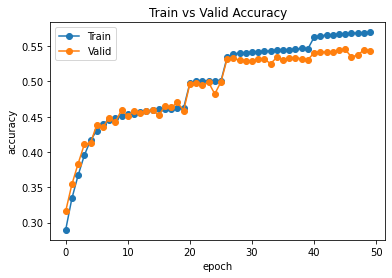

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_accu,'-o')
plt.plot(eval_accu,'-o')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Accuracy')

plt.show()

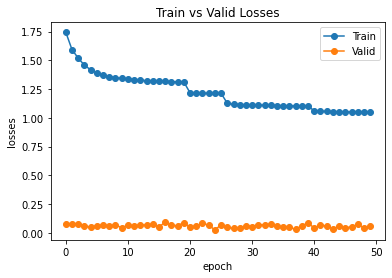

In [ ]:
plt.plot(train_losses,'-o')
plt.plot(eval_losses,'-o')
plt.xlabel('epoch')
plt.ylabel('losses')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Losses')

plt.show()

In [ ]:
torch.save(lstm.state_dict(), "/content/drive/MyDrive/lstmfinalresult.pth")

In [ ]:
lstm = LSTM().to(device)
lstm.load_state_dict(torch.load("/content/drive/MyDrive/lstmfinal.pth"))

<All keys matched successfully>

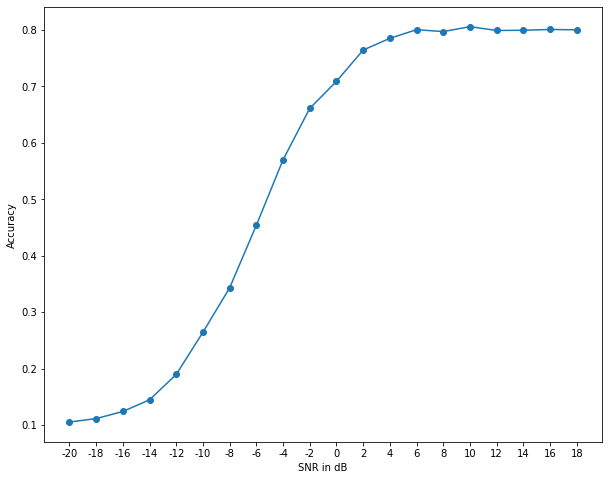

In [ ]:
from matplotlib import rcParams
snrsacc = plot_snr(lstm)
rcParams['figure.figsize'] = 10,8
plt.plot(snrs,snrsacc,linestyle="-",marker="o");
plt.ylabel('Accuracy')
plt.xlabel('SNR in dB')
plt.xticks(ticks=snrs, labels=snrs);

## Test function

In [ ]:
if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"
cnn = CNN().to(device)
cnn.load_state_dict(torch.load("/content/drive/MyDrive/cnn55.8.pth"))

<All keys matched successfully>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


def test_model(model, test_dataloader, device):
  y_pred = []
  y_true = []
  acc = []
  total = 0
  correct = 0
  model.eval()
  for input, target in test_dataloader:
    input = input.to(device)
    target = target.type(torch.LongTensor)
    target = target.to(device)
    prediction = model(input)
    for index, tensor_value in enumerate(prediction):
            total +=1
            y_pred.append(torch.argmax(tensor_value).data.cpu().numpy())
            y_true.append(target[index].data.cpu().numpy())
            if torch.argmax(tensor_value) == target[index]:
                correct += 1

    accuracy = correct /total
    acc.append(accuracy)

  
  classes = ('8PSK','AM-DSB','BPSK','CPFSK','GFSK','PAM4','QAM16','QAM64','QPSK','WBFM')
  target_name = ['8PSK','AM-DSB','BPSK','CPFSK','GFSK','PAM4','QAM16','QAM64','QPSK','WBFM']

  cf_matrix = confusion_matrix(y_true, y_pred)
  df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *6, index = [i for i in classes],
                     columns = [i for i in classes])
  plt.figure(figsize = (12,7))
  sn.heatmap(df_cm, annot=True)
  plt.savefig('output.png')
  print(classification_report(y_true, y_pred, target_names=target_name))
  acc = np.array(acc)
  print('Model Average accuracy', np.mean(acc))



In [ ]:
snr0indices = y_test.index[y_test['snr']==0].tolist()
labels0 = y_test.iloc[snr0indices]
labels0 = labels0.drop(['snr'],axis = 1)
labels0=np.array(labels0)
labels0 = np.unique(labels0, return_inverse= True)[1]
featurespace_test10 = featurespace_test1[snr0indices]

              precision    recall  f1-score   support

        8PSK       0.61      0.49      0.54      1800
      AM-DSB       0.60      0.97      0.74      1800
        BPSK       0.93      0.91      0.92      1800
       CPFSK       0.91      0.89      0.90      1800
        GFSK       0.97      0.95      0.96      1800
        PAM4       0.92      0.96      0.94      1800
       QAM16       0.45      0.43      0.44      1800
       QAM64       0.45      0.56      0.50      1800
        QPSK       0.69      0.67      0.68      1800
        WBFM       0.82      0.33      0.47      1800

    accuracy                           0.72     18000
   macro avg       0.73      0.72      0.71     18000
weighted avg       0.73      0.72      0.71     18000

Model Average accuracy 0.7093245325780001


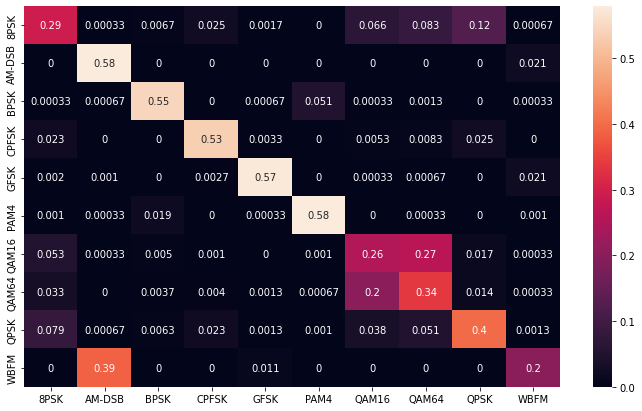

In [ ]:
#lstm model
from torch.utils.data import TensorDataset, DataLoader
dataset_test = Dataset(data = featurespace_test10, labels = labels0)
test_dataloader = DataLoader(dataset_test, batch_size=128)
# print(x_spectro_test)
test_model(lstm,test_dataloader,device )


              precision    recall  f1-score   support

        8PSK       0.37      0.34      0.35      1800
      AM-DSB       0.61      0.72      0.66      1800
        BPSK       0.84      0.80      0.82      1800
       CPFSK       0.75      0.82      0.78      1800
        GFSK       0.86      0.93      0.89      1800
        PAM4       0.82      0.92      0.87      1800
       QAM16       0.33      0.29      0.31      1800
       QAM64       0.41      0.44      0.42      1800
        QPSK       0.45      0.40      0.42      1800
        WBFM       0.59      0.48      0.53      1800

    accuracy                           0.61     18000
   macro avg       0.60      0.61      0.61     18000
weighted avg       0.60      0.61      0.61     18000

Model Average accuracy 0.6095289427839524


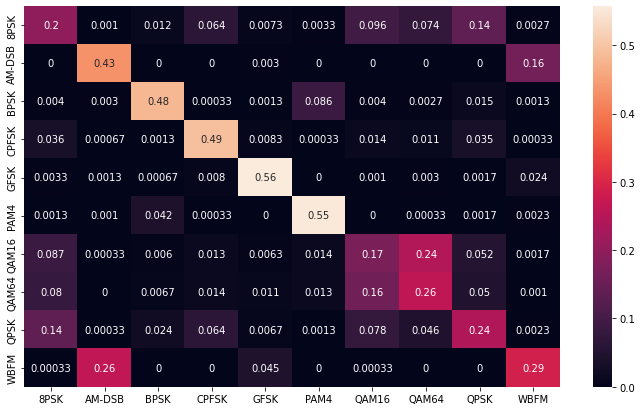

In [ ]:
from torch.utils.data import TensorDataset, DataLoader
dataset_test = Dataset(data = featurespace_test10, labels = labels0)
test_dataloader = DataLoader(dataset_test, batch_size=128)
# print(x_spectro_test)
test_model(rnn,test_dataloader,device )


In [ ]:
dataset_test = Dataset(data = X_test, labels = y_test['mod'])
test_dataloader = DataLoader(dataset_test, batch_size=64)
# print(x_spectro_test)
test_model(rnn,test_dataloader,device )


0.4725919653083323

              precision    recall  f1-score   support

        8PSK       0.26      0.42      0.32     36000
      AM-DSB       0.48      0.78      0.60     36000
        BPSK       0.54      0.61      0.57     36000
       CPFSK       0.64      0.65      0.65     36000
        GFSK       0.65      0.72      0.68     36000
        PAM4       0.77      0.62      0.69     36000
       QAM16       0.41      0.16      0.23     36000
       QAM64       0.52      0.45      0.48     36000
        QPSK       0.37      0.39      0.38     36000
        WBFM       0.66      0.30      0.41     36000

    accuracy                           0.51    360000
   macro avg       0.53      0.51      0.50    360000
weighted avg       0.53      0.51      0.50    360000

Model Average accuracy 0.5095561632166288


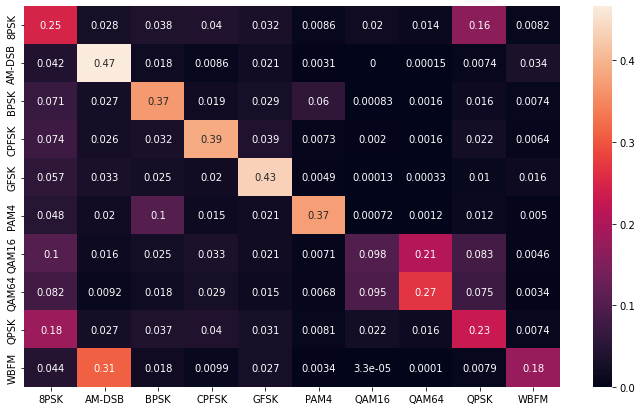

In [ ]:
dataset_test = Dataset(data = X_test, labels = y_test['mod'])
test_dataloader = DataLoader(dataset_test, batch_size=64)
test_model(lstm,test_dataloader,device )


              precision    recall  f1-score   support

        8PSK       0.49      0.41      0.45     36000
      AM-DSB       0.54      0.73      0.62     36000
        BPSK       0.33      0.82      0.47     36000
       CPFSK       0.75      0.60      0.66     36000
        GFSK       0.77      0.66      0.71     36000
        PAM4       0.83      0.66      0.73     36000
       QAM16       0.46      0.30      0.37     36000
       QAM64       0.52      0.42      0.47     36000
        QPSK       0.61      0.51      0.56     36000
        WBFM       0.54      0.29      0.38     36000

    accuracy                           0.54    360000
   macro avg       0.58      0.54      0.54    360000
weighted avg       0.58      0.54      0.54    360000

Model Average accuracy 0.5418887483714846


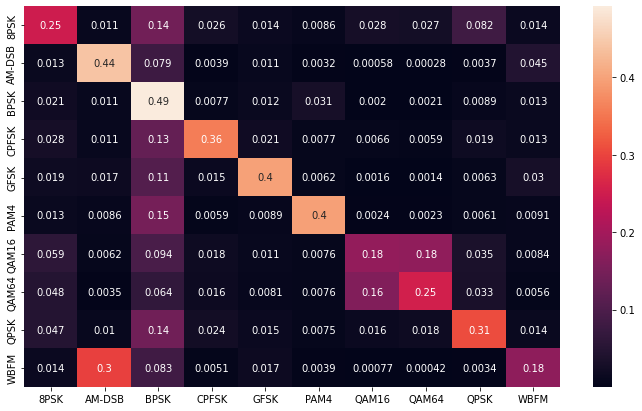

In [ ]:
# lstm with featuresoace 1200000,6,128
dataset_test = Dataset(data = featurespace_test1, labels = y_test['mod'])
test_dataloader = DataLoader(dataset_test, batch_size=64)
test_model(lstm,test_dataloader,device )